# <font color="red"> Logistic regression with gradient descent</font>
## <font color="red">-Rishit Dagli</font>
## This is a code to demonstrate logistic regression on the breast cancer Wisconin dataset. 
<img src="breast cancer description.PNG"></img>
## Attribute Information:
##### 1. Sample code number: id number
##### 2. Clump Thickness: 1 - 10
##### 3. Uniformity of Cell Size: 1 - 10
##### 4. Uniformity of Cell Shape: 1 - 10
##### 5. Marginal Adhesion: 1 - 10
##### 6. Single Epithelial Cell Size: 1 - 10
##### 7. Bare Nuclei: 1 - 10
##### 8. Bland Chromatin: 1 - 10
##### 9. Normal Nucleoli: 1 - 10
##### 10. Mitoses: 1 - 10
##### 11. Class: (2 for benign, 4 for malignant)
##### other algorithms used are multi class decision forest and neural networks check them out
## [Other algorithms by me](https://gallery.azure.ai/Experiment/Breast-cancer-dataset)
## [dataset reference](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) )

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Data preprocessing

In [2]:
df=pd.read_csv("breast-cancer.data.txt",na_values=['?'])
df.drop(["id"],axis=1,inplace=True)
df["label"].replace(2,0,inplace=True)
df["label"].replace(4,1,inplace=True)
df.dropna(inplace=True)

full_data=df.astype(float).values.tolist()
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


## Visulize data

### Make a feature wise scatterplot, these plots show clearly that this is a Logistic Regression problem. Try fit_reg=True to see how badly a line fits the data

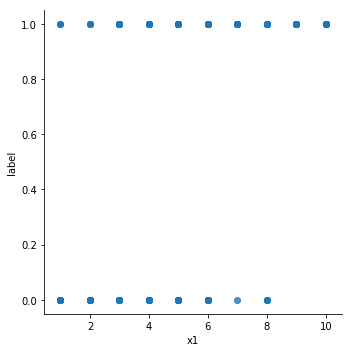

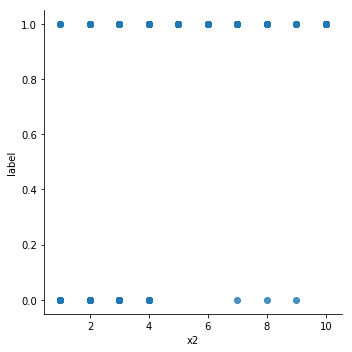

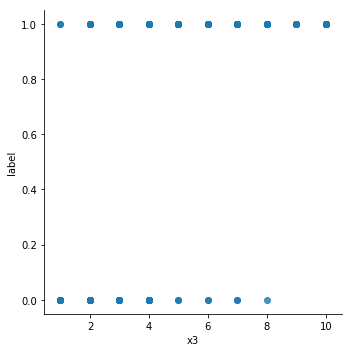

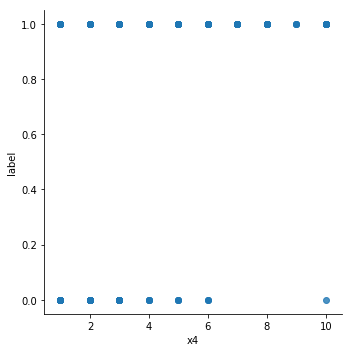

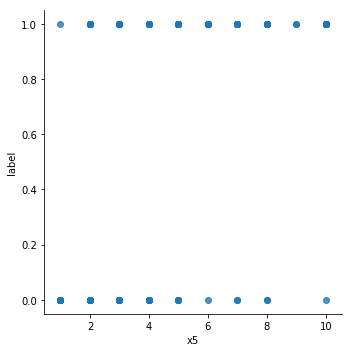

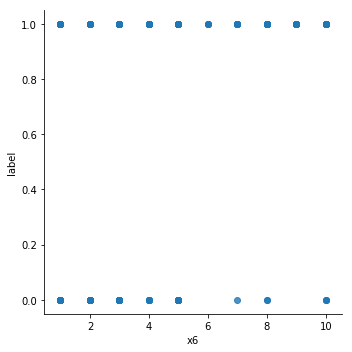

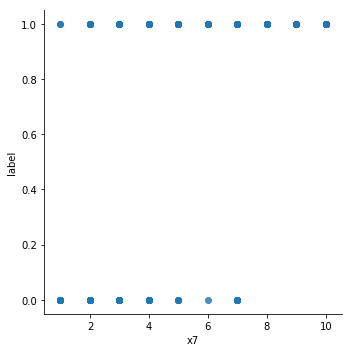

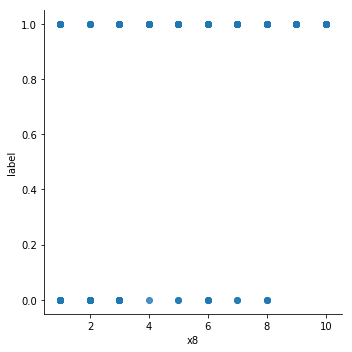

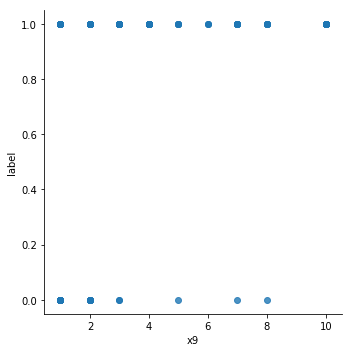

In [3]:
for i in range(1,10):
    sns.lmplot(str('x'+str(i)), 'label', data=df, fit_reg=False)

### Make a pairplot

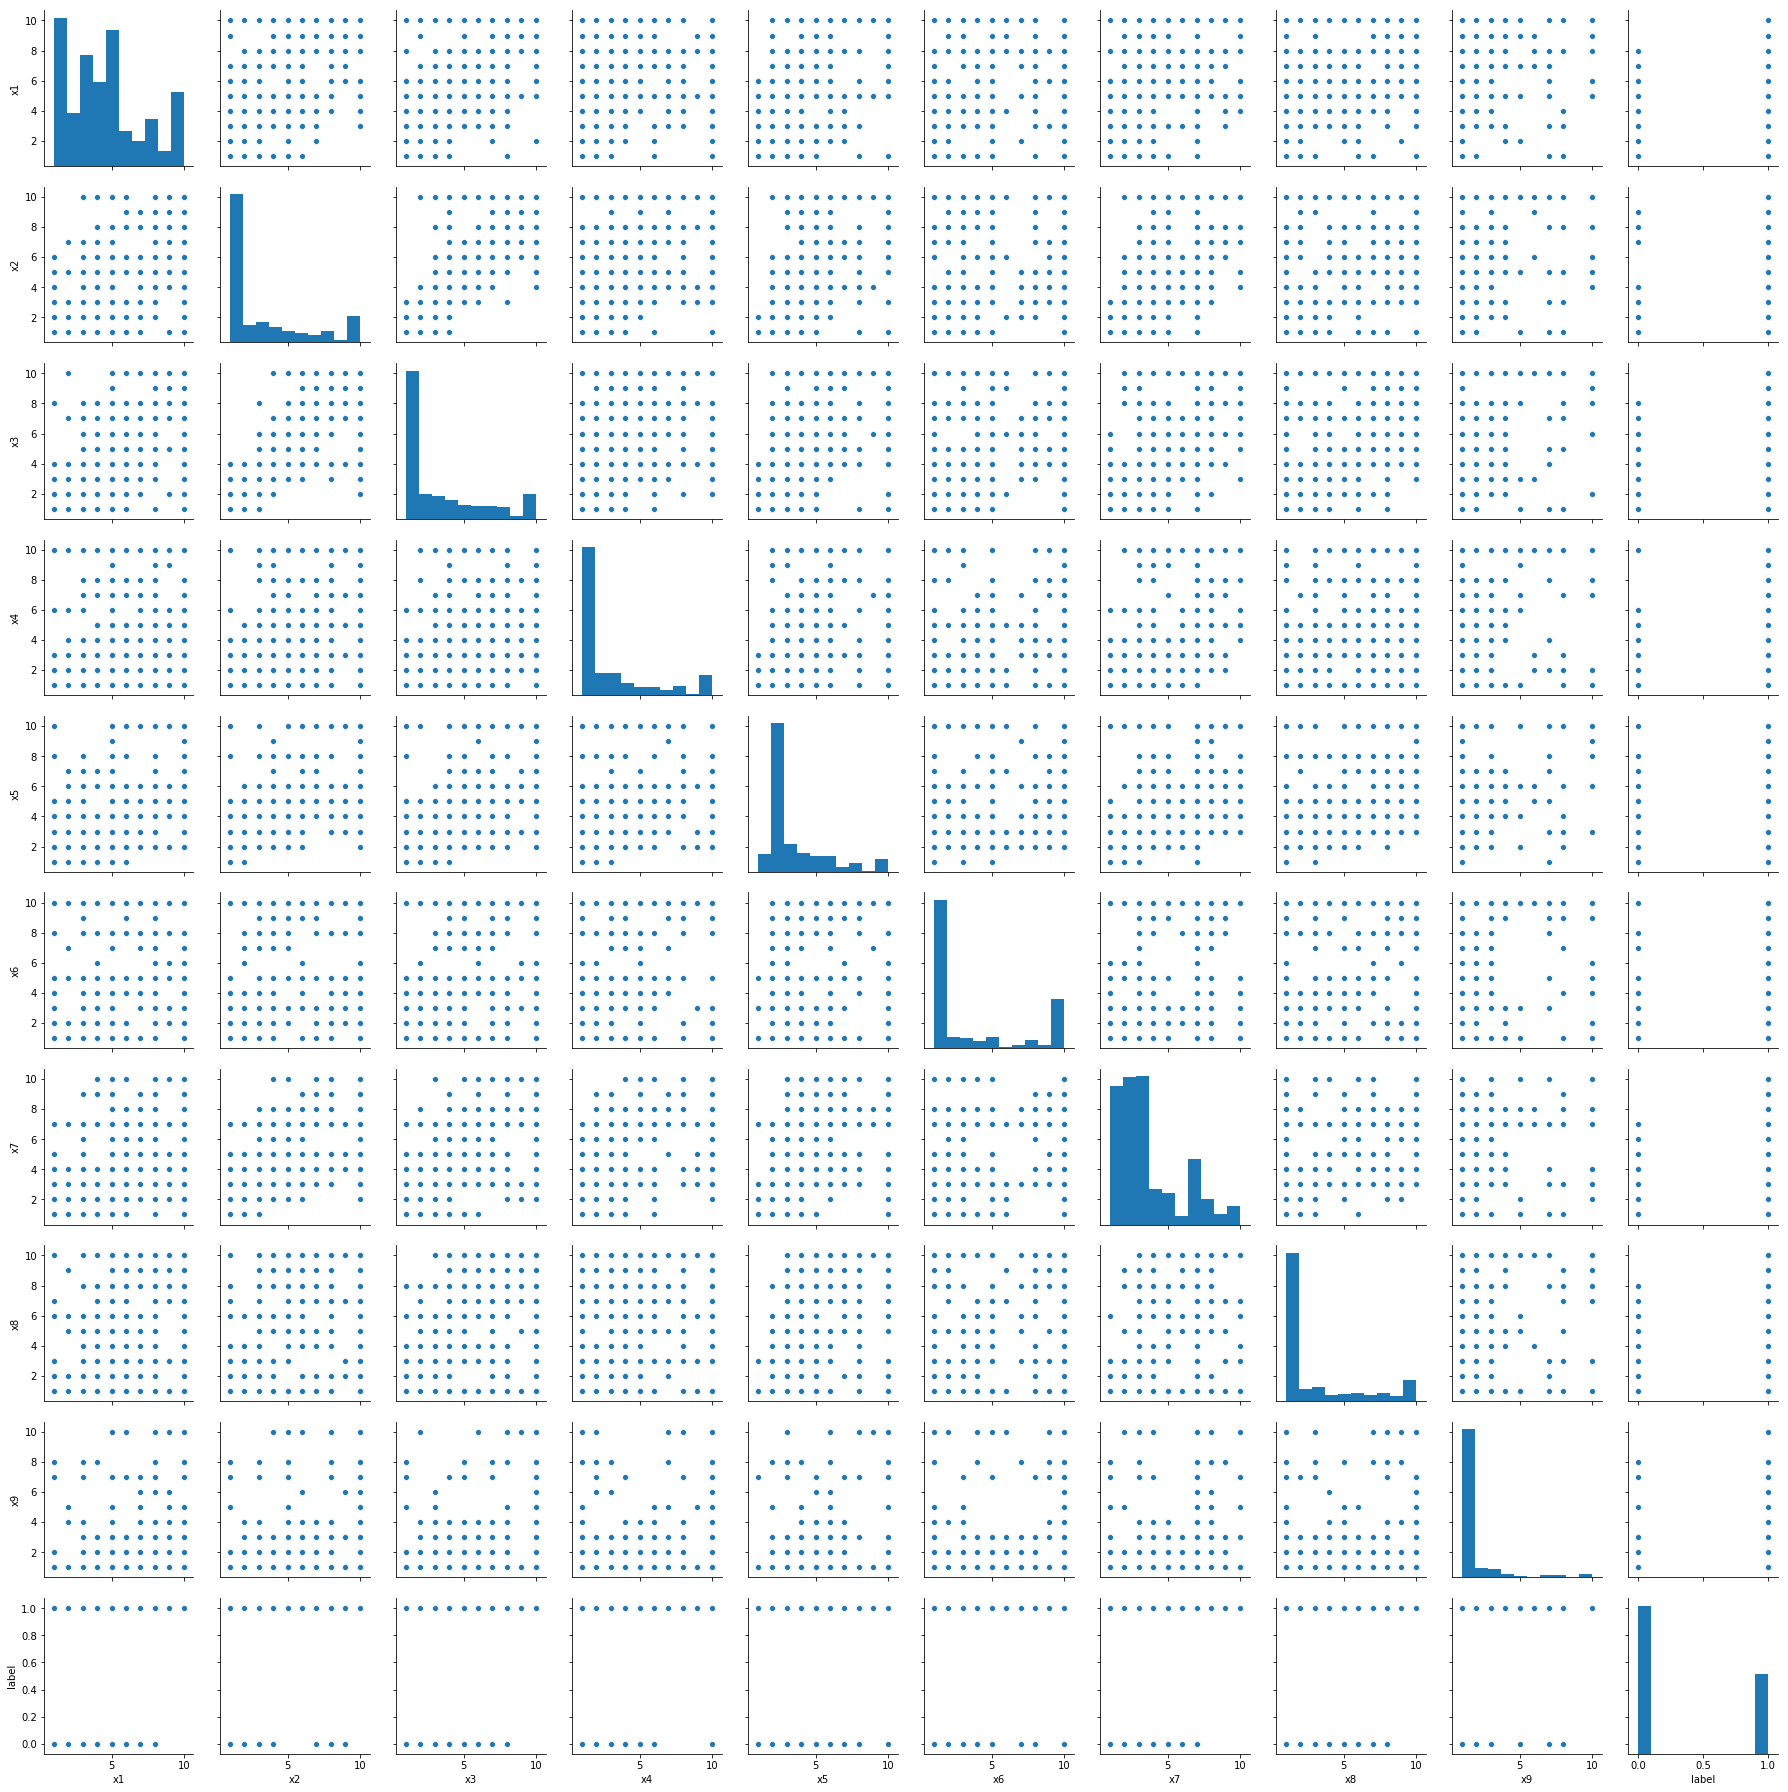

In [4]:
sns.pairplot(df)

### Make a feature wise density plot

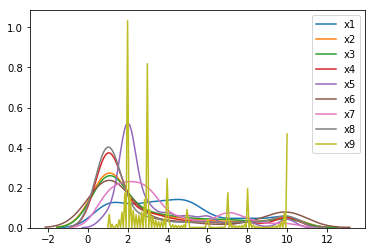

In [5]:
sns.kdeplot(df.x1)
sns.kdeplot(df.x2)
sns.kdeplot(df.x3)
sns.kdeplot(df.x4)
sns.kdeplot(df.x5)
sns.kdeplot(df.x6)
sns.kdeplot(df.x7)
sns.kdeplot(df.x8)
sns.kdeplot(df.x9)

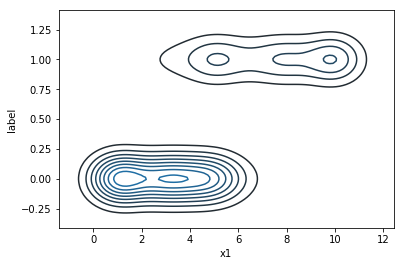

In [6]:
sns.kdeplot(df.x1,df.label)

## Do PCA
### if required, good accuracy without PCA too as only 9 features

### $axis=0$ as we need to calculate $\bar {X_{1}} $ and $\bar {X_{2}}$

In [7]:
data=np.array(full_data)
mean=np.mean(data,axis=0)
std=np.std(data,axis=0) # standard deviation

### Normalized data set

In [8]:
X=(data - mean)/std
X

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.61292736,
        -0.34839971, -0.73368133],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.28510482,
        -0.34839971, -0.73368133],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.61292736,
        -0.34839971, -0.73368133],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  2.33747554,
         0.22916583,  1.36298958],
       [-0.15686934,  1.58320366,  0.93248739, ...,  1.02618536,
        -0.34839971,  1.36298958],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  0.37054027,
        -0.34839971,  1.36298958]])

### Get covariance of $X=X^T \cdot X$

In [9]:
cov_X=np.dot(X.T,X)
eig_val, eig_vec = np.linalg.eig(cov_X)
print(X.shape)
PC=np.dot(X,eig_vec)
PC

(683, 10)


array([[ 1.63333457, -0.10118309,  0.53104907, ..., -0.4164441 ,
        -0.27286386,  0.32294989],
       [-1.09275267, -0.3679174 , -0.37635845, ..., -0.51227893,
         0.49984138, -0.76544419],
       [ 1.74849505, -0.06840633, -0.05456899, ..., -0.22030463,
         0.12489091,  0.33237089],
       ...,
       [-4.0177012 , -0.02068081, -0.85417583, ...,  0.61797546,
         0.04073364,  0.64195468],
       [-2.57900007, -1.0797101 , -1.0845814 , ...,  0.22920232,
        -0.17463118,  1.67533015],
       [-2.94612892, -1.14528796, -1.17012337, ...,  0.43947726,
        -0.34031866,  1.77321891]])

In [10]:
full_data[0]

[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 0.0]

In [11]:
random.shuffle(full_data)

In [12]:
full_data[0]

[6.0, 5.0, 4.0, 4.0, 3.0, 9.0, 7.0, 8.0, 3.0, 1.0]

In [13]:
full_data=np.matrix(full_data)
epoch=150000
alpha=0.001
x0=np.ones((full_data.shape[0],1))

data=np.concatenate((x0,full_data),axis=1)
print(data.shape)

theta=np.zeros((1,data.shape[1]-1))
print(theta.shape)
print(theta)

(683, 11)
(1, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
test_size=0.2
X_train=data[:-int(test_size*len(full_data)),:-1]
Y_train=data[:-int(test_size*len(full_data)),-1]
X_test=data[-int(test_size*len(full_data)):,:-1]
Y_test=data[-int(test_size*len(full_data)):,-1]


## Define BCE and sigmoid function

In [15]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def BCE(X,y,theta):
    pred=sigmoid(np.dot(X,theta.T))
    mcost=-np.array(y)*np.array(np.log(pred))-np.array((1-y))*np.array(np.log(1-pred))
    
    return mcost.mean()

## Gradient Descent

In [16]:
def grad_descent(X,y,theta,alpha):
    h=sigmoid(X.dot(theta.T))
    loss=h-y
    dj=(loss.T).dot(X)
    theta -= (alpha/(len(X))*dj)
    return theta
            
cost=BCE(X_train,Y_train,theta)
print("cost before: ",cost)
            
theta=grad_descent(X_train,Y_train,theta,alpha)
            
cost=BCE(X_train,Y_train,theta)
print("cost after: ",cost)

cost before:  0.6931471805599453
cost after:  0.6904842578095582


In [17]:
theta

array([[-0.00015814,  0.00027057,  0.00072578,  0.00070201,  0.00051005,
         0.00025137,  0.00085558,  0.00035466,  0.00062523,  0.00011517]])

In [18]:
def logistic_reg(epoch,X,y,theta,alpha):
    for ep in range(epoch):
#         update theta 
        theta=grad_descent(X,y,theta,alpha)
        
#         calculate new loss
        if ((ep+1)%1000 == 0):
            loss=BCE(X,y,theta)
            print("Cost function ",loss)
    return theta

theta=logistic_reg(epoch,X_train,Y_train,theta,alpha)

Cost function  0.4516694816940516
Cost function  0.3849551422318817
Cost function  0.3487484216658029
Cost function  0.32456928276448466
Cost function  0.30659969737536397
Cost function  0.29234765154492814
Cost function  0.28054041127122853
Cost function  0.2704501107046979
Cost function  0.2616263700522487
Cost function  0.25377375717751904
Cost function  0.24668946185174329
Cost function  0.24022902351342085
Cost function  0.2342863138089322
Cost function  0.2287812706058788
Cost function  0.22365208200616976
Cost function  0.21885004065858696
Cost function  0.21433606050552234
Cost function  0.2100782612180234
Cost function  0.206050256920782
Cost function  0.20222992044499313
Cost function  0.19859847533603686
Cost function  0.19513981797877708
Cost function  0.19184000402676155
Cost function  0.1886868539710768
Cost function  0.185669646347322
Cost function  0.1827788762780562
Cost function  0.18000606333987715
Cost function  0.17734359711025555
Cost function  0.17478461181961683

In [19]:
print(BCE(X_train,Y_train,theta))
print(BCE(X_test,Y_test,theta))

0.08476674684708176
0.1583086709573387
